# Language Models with RNN, LSTM

*  firstly implement a vanilla RNN to get warm up, and then implement an LSTM to train a model that can generate text using your own text source (novel, lyrics etc).

In [2]:
from lib.rnn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Recurrent Neural Networks
use recurrent neural network (RNN) language models for text generation.

the function `VanillaRNN` of the file `lib/layer_utils.py` contain implementations of different layer types that are needed for recurrent neural networks.

And then, the file `lib/rnn.py` uses these layers to implement an text generation model.

# Vanilla RNN: step forward
Implement the forward and backward passes for different types of layers that are commonly used in recurrent neural networks.

First complete the implementation of the function `step_forward` which implements the forward pass for a single timestep of a vanilla recurrent neural network.

In [7]:
%reload_ext autoreload

N, D, H = 3, 10, 4

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")
x = np.linspace(-0.4, 0.7, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.2, 0.5, num=N*H).reshape(N, H)

rnn.params[rnn.wx_name] = np.linspace(-0.1, 0.9, num=D*H).reshape(D, H)
rnn.params[rnn.wh_name] = np.linspace(-0.3, 0.7, num=H*H).reshape(H, H)
rnn.params[rnn.b_name] = np.linspace(-0.2, 0.4, num=H)

next_h, _ = rnn.step_forward(x, prev_h)
expected_next_h = np.asarray([
  [-0.58172089, -0.50182032, -0.41232771, -0.31410098],
  [ 0.66854692,  0.79562378,  0.87755553,  0.92795967],
  [ 0.97934501,  0.99144213,  0.99646691,  0.99854353]])

print('next_h error: ', rel_error(expected_next_h, next_h))

next_h error:  6.29242142647e-09


# Vanilla RNN: step backward
In the `VanillaRNN` class in the file `lib/layer_utils.py` complete the `step_backward` function.

In [31]:
%reload_ext autoreload

np.random.seed(231)
N, D, H = 4, 5, 6

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.random.randn(N, D)
h = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

out, meta = rnn.step_forward(x, h)

dnext_h = np.random.randn(*out.shape)

dx_num = eval_numerical_gradient_array(lambda x: rnn.step_forward(x, h)[0], x, dnext_h)
dprev_h_num = eval_numerical_gradient_array(lambda h: rnn.step_forward(x, h)[0], h, dnext_h)
dWx_num = eval_numerical_gradient_array(lambda Wx: rnn.step_forward(x, h)[0], Wx, dnext_h)
dWh_num = eval_numerical_gradient_array(lambda Wh: rnn.step_forward(x, h)[0], Wh, dnext_h)
db_num = eval_numerical_gradient_array(lambda b: rnn.step_forward(x, h)[0], b, dnext_h)

dx, dprev_h, dWx, dWh, db = rnn.step_backward(dnext_h, meta)

print('dx error: ', rel_error(dx_num, dx))
print('dprev_h error: ', rel_error(dprev_h_num, dprev_h))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  9.9560478332e-10
dprev_h error:  2.34982119595e-10
dWx error:  1.93701076693e-10
dWh error:  3.1863456359e-10
db error:  6.4155052292e-11


# Vanilla RNN: forward
Implement a RNN that process an entire sequence of data.

In the `VanillaRNN` class in the file `lib/layer_utils.py`, complete the function `forward`. This is implemented using the `step_forward` function that you defined above.

After doing so run the following to check the implementation. You should see errors less than `1e-7`.

In [17]:
%reload_ext autoreload

N, T, D, H = 2, 3, 4, 5

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.linspace(-0.1, 0.3, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.3, 0.1, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.4, num=D*H).reshape(D, H)
Wh = np.linspace(-0.4, 0.1, num=H*H).reshape(H, H)
b = np.linspace(-0.7, 0.1, num=H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

h = rnn.forward(x, h0)
expected_h = np.asarray([
  [
    [-0.42070749, -0.27279261, -0.11074945,  0.05740409,  0.22236251],
    [-0.39525808, -0.22554661, -0.0409454,   0.14649412,  0.32397316],
    [-0.42305111, -0.24223728, -0.04287027,  0.15997045,  0.35014525],
  ],
  [
    [-0.55857474, -0.39065825, -0.19198182,  0.02378408,  0.23735671],
    [-0.27150199, -0.07088804,  0.13562939,  0.33099728,  0.50158768],
    [-0.51014825, -0.30524429, -0.06755202,  0.17806392,  0.40333043]]])
print('h error: ', rel_error(expected_h, h))

h error:  7.72846618019e-08


# Vanilla RNN: backward
The backward pass for a vanilla RNN in the function `backward` in the `VanillaRNN` class. This runs back-propagation over the entire sequence, calling into the `step_backward` function defined above.

You should see errors less than 5e-7.

In [30]:
%reload_ext autoreload

np.random.seed(231)

N, D, T, H = 2, 3, 10, 5

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

out = rnn.forward(x, h0)

dout = np.random.randn(*out.shape)

dx, dh0 = rnn.backward(dout)

dx_num = eval_numerical_gradient_array(lambda x: rnn.forward(x, h0), x, dout)
dh0_num = eval_numerical_gradient_array(lambda h0: rnn.forward(x, h0), h0, dout)
dWx_num = eval_numerical_gradient_array(lambda Wx: rnn.forward(x, h0), Wx, dout)
dWh_num = eval_numerical_gradient_array(lambda Wh: rnn.forward(x, h0), Wh, dout)
db_num = eval_numerical_gradient_array(lambda b: rnn.forward(x, h0), b, dout)

dWx = rnn.grads[rnn.wx_name]
dWh = rnn.grads[rnn.wh_name]
db = rnn.grads[rnn.b_name]

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  2.73692843589e-08
dh0 error:  8.66840780658e-10
dWx error:  2.07891607104e-08
dWh error:  1.52131834959e-08
db error:  2.89756878459e-10


# Word embedding: forward
In deep learning systems, we commonly represent words using vectors. Each word of the vocabulary will be associated with a vector, and these vectors will be learned jointly with the rest of the system.

Implement the function `forward` in the `word_embedding` class to convert words (represented by integers) into vectors.

In [34]:
%reload_ext autoreload

N, T, V, D = 2, 4, 5, 3

we = word_embedding(V, D, name="we")

x = np.asarray([[0, 3, 1, 2], [2, 1, 0, 3]])
W = np.linspace(0, 1, num=V*D).reshape(V, D)

we.params[we.w_name] = W

out = we.forward(x)
expected_out = np.asarray([
 [[ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.42857143,  0.5,         0.57142857]],
 [[ 0.42857143,  0.5,         0.57142857],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429]]])

print('out error: ', rel_error(expected_out, out))

out error:  1.00000000947e-08


# Word embedding: backward
Implement the backward pass for the word embedding function in the function `backward` in the `word_embedding` class. After doing so run the following to numerically gradient check your implementation. You should see errors less than `1e-11`.

In [35]:
%reload_ext autoreload

np.random.seed(231)

N, T, V, D = 50, 3, 5, 6

we = word_embedding(V, D, name="we")

x = np.random.randint(V, size=(N, T))
W = np.random.randn(V, D)

we.params[we.w_name] = W

out = we.forward(x)
dout = np.random.randn(*out.shape)
we.backward(dout)

dW = we.grads[we.w_name]

f = lambda W: we.forward(x)
dW_num = eval_numerical_gradient_array(f, W, dout)

print('dW error: ', rel_error(dW, dW_num))

dW error:  3.27594409348e-12


# Temporal Fully Connected layer
At every timestep we use an affine function to transform the RNN hidden vector at that timestep into scores for each word in the vocabulary. Because this is very similar to the fully connected layer that you implemented in assignment 1, we have provided this function for you in the `forward` and `backward` functions in the file `lib/layer_util.py`. Run the following to perform numeric gradient checking on the implementation.

In [36]:
%reload_ext autoreload

np.random.seed(231)

# Gradient check for temporal affine layer
N, T, D, M = 2, 3, 4, 5

t_fc = temporal_fc(D, M, init_scale=0.02, name='test_t_fc')

x = np.random.randn(N, T, D)
w = np.random.randn(D, M)
b = np.random.randn(M)

t_fc.params[t_fc.w_name] = w
t_fc.params[t_fc.b_name] = b

out = t_fc.forward(x)

dout = np.random.randn(*out.shape)

dx_num = eval_numerical_gradient_array(lambda x: t_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: t_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: t_fc.forward(x), b, dout)

dx = t_fc.backward(dout)
dw = t_fc.grads[t_fc.w_name]
db = t_fc.grads[t_fc.b_name]

print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

dx error:  3.22694703901e-10
dw error:  3.85956199426e-11
db error:  1.14553962636e-11


# Temporal Softmax loss
In an RNN language model, at every timestep we produce a score for each word in the vocabulary. We know the ground-truth word at each timestep, so we use a softmax loss function to compute loss and gradient at each timestep. We sum the losses over time and average them over the minibatch.

We provide this loss function for you; look at the `temporal_softmax_loss` function in the file `lib/layer_utils.py`.

Run the following cell to sanity check the loss and perform numeric gradient checking on the function. You should see an error for dx less than 1e-7.

In [37]:
%reload_ext autoreload

loss_func = temporal_softmax_loss()

# Sanity check for temporal softmax loss
N, T, V = 100, 1, 10

def check_loss(N, T, V, p):
    x = 0.001 * np.random.randn(N, T, V)
    y = np.random.randint(V, size=(N, T))
    mask = np.random.rand(N, T) <= p
    print(loss_func.forward(x, y, mask))
  
check_loss(100, 1, 10, 1.0)   # Should be about 2.3
check_loss(100, 10, 10, 1.0)  # Should be about 23
check_loss(5000, 10, 10, 0.1) # Should be about 2.3

# Gradient check for temporal softmax loss
N, T, V = 7, 8, 9

x = np.random.randn(N, T, V)
y = np.random.randint(V, size=(N, T))
mask = (np.random.rand(N, T) > 0.5)

loss = loss_func.forward(x, y, mask)
dx = loss_func.backward()

dx_num = eval_numerical_gradient(lambda x: loss_func.forward(x, y, mask), x, verbose=False)

print('dx error: ', rel_error(dx, dx_num))

2.30265472793
23.0263070393
2.29890092925
dx error:  4.0464746298e-08


# RNN for language modeling
Now that you have the necessary layers, you can combine them to build a language modeling model. Open the file `lib/rnn.py` and look at the `TestRNN` class.

Check the forward and backward pass of the model in the `loss` function. For now you only see the implementation of the case where `cell_type='rnn'` for vanilla RNNs. Run the following to check the forward pass using a small test case; you should see error less than `1e-10`.

In [40]:
%reload_ext autoreload

N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='rnn')
loss_func = temporal_softmax_loss()

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 51.0949189134

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  51.0949189134
expected loss:  51.0949189134
difference:  3.88169496546e-11


Run the following cell to perform numeric gradient checking on the `TestRNN` class; you should errors around `1e-7` or less.

In [41]:
%reload_ext autoreload

np.random.seed(231)

batch_size = 2
timesteps = 3
input_dim = 4
hidden_dim = 6
label_size = 4

labels = np.random.randint(label_size, size=(batch_size, timesteps))
features = np.random.randn(batch_size, timesteps, input_dim)
h0 = np.random.randn(batch_size, hidden_dim)

model = TestRNN(input_dim, hidden_dim, cell_type='rnn')
loss_func = temporal_softmax_loss()

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((batch_size, timesteps))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

dout, dh0 = model.backward(dLoss)

grads = model.grads

for param_name in sorted(grads):
    
    f = lambda _: loss_func.forward(model.forward(features, h0), labels, mask)
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s relative error: %e' % (param_name, e))

vanilla_rnn_b relative error: 9.451394e-08
vanilla_rnn_wh relative error: 3.221744e-08
vanilla_rnn_wx relative error: 9.508480e-08


# LSTM
Vanilla RNNs can be tough to train on long sequences due to vanishing and exploding gradiants. LSTMs solve this problem by replacing the simple update rule of the vanilla RNN with a gating mechanism as follows.

Similar to the vanilla RNN, at each timestep we receive an input $x_t\\in\\mathbb{R}^D$ and the previous hidden state $h_{t-1}\\in\\mathbb{R}^H$; what is different in the LSTM is to maintain an $H$-dimensional *cell state*, so we also receive the previous cell state $c_{t-1}\\in\\mathbb{R}^H$. The learnable parameters of the LSTM are an *input-to-hidden* matrix $W_x\\in\\mathbb{R}^{4H\\times D}$, a *hidden-to-hidden* matrix $W_h\\in\\mathbb{R}^{4H\\times H}$ and a *bias vector* $b\\in\\mathbb{R}^{4H}$.

At each timestep we first compute an *activation vector* $a\in\mathbb{R}^{4H}$ as $a=W_xx_t + W_hh_{t-1}+b$. We then divide this into four vectors $a_i,a_f,a_o,a_g\in\mathbb{R}^H$ where $a_i$ consists of the first $H$ elements of $a$, $a_f$ is the next $H$ elements of $a$, etc. We then compute the *input gate* $g\in\mathbb{R}^H$, *forget gate* $f\in\mathbb{R}^H$, *output gate* $o\in\mathbb{R}^H$ and *gate gate* $g\in\mathbb{R}^H$ as

$$
\begin{align*}
i = \sigma(a_i) \hspace{2pc}
f = \sigma(a_f) \hspace{2pc}
o = \sigma(a_o) \hspace{2pc}
g = \tanh(a_g)
\end{align*}
$$

where $\sigma$ is the sigmoid function and $\tanh$ is the hyperbolic tangent, both applied elementwise.

Finally we compute the next cell state $c_t$ and next hidden state $h_t$ as

$$
c_{t} = f\odot c_{t-1} + i\odot g \hspace{4pc}
h_t = o\odot\tanh(c_t)
$$

where $\odot$ is the elementwise product of vectors.

In the rest of the notebook we will implement the LSTM update rule and apply it to the text generation task. 

In the code, we assume that data is stored in batches so that $X_t \in \mathbb{R}^{N\times D}$, and will work with *transposed* versions of the parameters: $W_x \in \mathbb{R}^{D \times 4H}$, $W_h \in \mathbb{R}^{H\times 4H}$ so that activations $A \in \mathbb{R}^{N\times 4H}$ can be computed efficiently as $A = X_t W_x + H_{t-1} W_h$

# LSTM: step forward
Implement the forward pass for a single timestep of an LSTM in the `step_forward` function in the file `lib/layer_utils.py`. This should be similar to the `step_forward` function that you implemented above, but using the LSTM update rule instead.

A simple test of your implementation. You see errors around `1e-8` or less.

In [44]:
%reload_ext autoreload

N, D, H = 3, 4, 5

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.linspace(-0.4, 1.2, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.3, 0.7, num=N*H).reshape(N, H)
prev_c = np.linspace(-0.4, 0.9, num=N*H).reshape(N, H)
Wx = np.linspace(-2.1, 1.3, num=4*D*H).reshape(D, 4 * H)
Wh = np.linspace(-0.7, 2.2, num=4*H*H).reshape(H, 4 * H)
b = np.linspace(0.3, 0.7, num=4*H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

next_h, next_c, cache = lstm.step_forward(x, prev_h, prev_c)

expected_next_h = np.asarray([
    [ 0.24635157,  0.28610883,  0.32240467,  0.35525807,  0.38474904],
    [ 0.49223563,  0.55611431,  0.61507696,  0.66844003,  0.7159181 ],
    [ 0.56735664,  0.66310127,  0.74419266,  0.80889665,  0.858299  ]])
expected_next_c = np.asarray([
    [ 0.32986176,  0.39145139,  0.451556,    0.51014116,  0.56717407],
    [ 0.66382255,  0.76674007,  0.87195994,  0.97902709,  1.08751345],
    [ 0.74192008,  0.90592151,  1.07717006,  1.25120233,  1.42395676]])

print('next_h error: ', rel_error(expected_next_h, next_h))
print('next_c error: ', rel_error(expected_next_c, next_c))

next_h error:  5.70541311858e-09
next_c error:  5.81431230888e-09


# LSTM: step backward
Implement the backward pass for a single LSTM timestep in the function `step_backward` in the file `lib/layer_utils.py`. Perform numeric gradient checking on your implementation. You see errors around `1e-6` or less.

In [45]:
%reload_ext autoreload

np.random.seed(231)

N, D, H = 4, 5, 6

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.random.randn(N, D)
prev_h = np.random.randn(N, H)
prev_c = np.random.randn(N, H)
Wx = np.random.randn(D, 4 * H)
Wh = np.random.randn(H, 4 * H)
b = np.random.randn(4 * H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

next_h, next_c, cache = lstm.step_forward(x, prev_h, prev_c)

dnext_h = np.random.randn(*next_h.shape)
dnext_c = np.random.randn(*next_c.shape)

fx_h = lambda x: lstm.step_forward(x, prev_h, prev_c)[0]
fh_h = lambda h: lstm.step_forward(x, prev_h, prev_c)[0]
fc_h = lambda c: lstm.step_forward(x, prev_h, prev_c)[0]
fWx_h = lambda Wx: lstm.step_forward(x, prev_h, prev_c)[0]
fWh_h = lambda Wh: lstm.step_forward(x, prev_h, prev_c)[0]
fb_h = lambda b: lstm.step_forward(x, prev_h, prev_c)[0]

fx_c = lambda x: lstm.step_forward(x, prev_h, prev_c)[1]
fh_c = lambda h: lstm.step_forward(x, prev_h, prev_c)[1]
fc_c = lambda c: lstm.step_forward(x, prev_h, prev_c)[1]
fWx_c = lambda Wx: lstm.step_forward(x, prev_h, prev_c)[1]
fWh_c = lambda Wh: lstm.step_forward(x, prev_h, prev_c)[1]
fb_c = lambda b: lstm.step_forward(x, prev_h, prev_c)[1]

num_grad = eval_numerical_gradient_array

dx_num = num_grad(fx_h, x, dnext_h) + num_grad(fx_c, x, dnext_c)
dh_num = num_grad(fh_h, prev_h, dnext_h) + num_grad(fh_c, prev_h, dnext_c)
dc_num = num_grad(fc_h, prev_c, dnext_h) + num_grad(fc_c, prev_c, dnext_c)
dWx_num = num_grad(fWx_h, Wx, dnext_h) + num_grad(fWx_c, Wx, dnext_c)
dWh_num = num_grad(fWh_h, Wh, dnext_h) + num_grad(fWh_c, Wh, dnext_c)
db_num = num_grad(fb_h, b, dnext_h) + num_grad(fb_c, b, dnext_c)

dx, dh, dc, dWx, dWh, db = lstm.step_backward(dnext_h, dnext_c, cache)

print('dx error: ', rel_error(dx_num, dx))
print('dh error: ', rel_error(dh_num, dh))
print('dc error: ', rel_error(dc_num, dc))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  7.10172488323e-10
dh error:  1.21109602583e-08
dc error:  1.01272810791e-08
dWx error:  7.15532717537e-08
dWh error:  9.78443400377e-08
db error:  1.86716972845e-08


# LSTM: forward
In the class `lstm` in the file `lib/layer_utils.py`, implement the `forward` function to run an LSTM forward on an entire timeseries of data.

Run the following to check your implementation. You see an error around `1e-7`.

In [55]:
%reload_ext autoreload

N, D, H, T = 2, 5, 4, 3

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.linspace(-0.4, 0.6, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.4, 0.8, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.9, num=4*D*H).reshape(D, 4 * H)
Wh = np.linspace(-0.3, 0.6, num=4*H*H).reshape(H, 4 * H)
b = np.linspace(0.2, 0.7, num=4*H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

h = lstm.forward(x, h0)

expected_h = np.asarray([
 [[ 0.01764008,  0.01823233,  0.01882671,  0.0194232 ],
  [ 0.11287491,  0.12146228,  0.13018446,  0.13902939],
  [ 0.31358768,  0.33338627,  0.35304453,  0.37250975]],
 [[ 0.45767879,  0.4761092,   0.4936887,   0.51041945],
  [ 0.6704845,   0.69350089,  0.71486014,  0.7346449 ],
  [ 0.81733511,  0.83677871,  0.85403753,  0.86935314]]])

print('h error: ', rel_error(expected_h, h))

h error:  8.61053745211e-08


# LSTM: backward
Implement the backward pass for an LSTM over an entire timeseries of data in the function `backward` in the `lstm` class in the file `lib/layer_utils.py`. Run the following to perform numeric gradient checking on your implementation. You see errors around `1e-7` or less.

In [58]:
%reload_ext autoreload

np.random.seed(231)

N, D, T, H = 2, 3, 10, 6

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, 4 * H)
Wh = np.random.randn(H, 4 * H)
b = np.random.randn(4 * H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

out = lstm.forward(x, h0)

dout = np.random.randn(*out.shape)

dx, dh0 = lstm.backward(dout)
dWx = lstm.grads[lstm.wx_name] 
dWh = lstm.grads[lstm.wh_name]
db = lstm.grads[lstm.b_name]

dx_num = eval_numerical_gradient_array(lambda x: lstm.forward(x, h0), x, dout)
dh0_num = eval_numerical_gradient_array(lambda h0: lstm.forward(x, h0), h0, dout)
dWx_num = eval_numerical_gradient_array(lambda Wx: lstm.forward(x, h0), Wx, dout)
dWh_num = eval_numerical_gradient_array(lambda Wh: lstm.forward(x, h0), Wh, dout)
db_num = eval_numerical_gradient_array(lambda b: lstm.forward(x, h0), b, dout)

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  1.18362220868e-09
dh0 error:  4.59448904887e-10
dWx error:  1.76064668221e-09
dWh error:  1.25964794142e-07
db error:  3.86136765676e-10


# LSTM model

Now that you have implemented an LSTM, update the initialization of the `TestRNN` class in the file `lib/rnn.py` to handle the case where `self.cell_type` is `lstm`. This should require adding only one line of code.

Run the following to check your implementation. You see a difference of less than `1e-10`.

In [52]:
%reload_ext autoreload

N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='lstm')
loss_func = temporal_softmax_loss()

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 49.2140256354

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  49.2140256354
expected loss:  49.2140256354
difference:  4.29238866673e-11


# Now, ready!!

Text generation using RNNs from any text source (novel, lyrics).

The network is trained to predict what word is coming next given a previous word. Once we train the model, by looping the network, we can keep generating a new text which is mimicing the original text source.

We will use one of the most frequently downloaded e-books, Alice's Adventures in Wonderland, from Project Gutenberg, where the original link can be found [here](https://www.gutenberg.org/ebooks/11).

In [59]:
%reload_ext autoreload

input_file = open("data/alice.txt", "r")
input_text = input_file.readlines()
input_text = ''.join(input_text)

simply run the following code to construct training dataset<br />

In [60]:
%reload_ext autoreload

import re

text = re.split(' |\n',input_text.lower()) # all words are converted into lower case
outputSize = len(text)
word_list = list(set(text))
dataSize = len(word_list)
output = np.zeros(outputSize)
for i in range(0, outputSize):
    index = np.where(np.asarray(word_list) == text[i])
    output[i] = index[0]
data_labels = output.astype(np.int)
gt_labels = data_labels[1:]
data_labels = data_labels[:-1]

print('Input text size: %s' % outputSize)
print('Input word number: %s' % dataSize)

Input text size: 2170
Input word number: 778


We defined a LanguageModelRNN class in rnn.py.
* Here design a recurrent neutral network consisting of a word_embedding layer, recurrent unit, and temporal fully connected layers so that they match the provided dimensions.
* Please read the train.py under lib directory carefully.

In [72]:
%reload_ext autoreload

# you can change the following parameters.
D = 10 # input dimention
H = 20 # hidden space dimention
T = 50 # timesteps
N = 10 # batch size
max_epoch = 100 # max epoch size

loss_func = temporal_softmax_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = { 'data_train': data_labels, 'labels_train': gt_labels }

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)


(Iteration 1 / 21600) loss: 332.83829603246465
best performance 3.5961272475795294%
(Epoch 1 / 100) Training Accuracy: 0.035961272475795295
best performance 4.149377593360995%
(Epoch 2 / 100) Training Accuracy: 0.04149377593360996
(Iteration 501 / 21600) loss: 288.13414187224254
(Epoch 3 / 100) Training Accuracy: 0.04149377593360996
(Epoch 4 / 100) Training Accuracy: 0.0396496081143384
(Iteration 1001 / 21600) loss: 272.1050070121426
best performance 6.039649608114338%
(Epoch 5 / 100) Training Accuracy: 0.060396496081143385
(Epoch 6 / 100) Training Accuracy: 0.05624711848778239
(Iteration 1501 / 21600) loss: 259.9572222773959
best performance 6.869525126786538%
(Epoch 7 / 100) Training Accuracy: 0.06869525126786538
best performance 7.56108805901337%
(Epoch 8 / 100) Training Accuracy: 0.0756108805901337
best performance 7.883817427385892%
(Epoch 9 / 100) Training Accuracy: 0.07883817427385892
(Iteration 2001 / 21600) loss: 247.43685585492472
best performance 8.34485938220378%
(Epoch 10 

(Iteration 16001 / 21600) loss: 55.881558717852144
best performance 72.06085753803596%
(Epoch 75 / 100) Training Accuracy: 0.7206085753803596
best performance 72.42969110189027%
(Epoch 76 / 100) Training Accuracy: 0.7242969110189027
(Iteration 16501 / 21600) loss: 56.59280895081811
best performance 72.84462886122637%
(Epoch 77 / 100) Training Accuracy: 0.7284462886122637
best performance 73.44398340248964%
(Epoch 78 / 100) Training Accuracy: 0.7344398340248963
(Iteration 17001 / 21600) loss: 56.538359883243075
(Epoch 79 / 100) Training Accuracy: 0.7335177501152604
best performance 74.08944213923468%
(Epoch 80 / 100) Training Accuracy: 0.7408944213923467
best performance 74.50437989857078%
(Epoch 81 / 100) Training Accuracy: 0.7450437989857077
(Iteration 17501 / 21600) loss: 57.48237766374048
best performance 74.87321346242508%
(Epoch 82 / 100) Training Accuracy: 0.7487321346242508
best performance 75.28815122176118%
(Epoch 83 / 100) Training Accuracy: 0.7528815122176118
(Iteration 1800

Simply run the following code block to check the loss and accuracy curve.

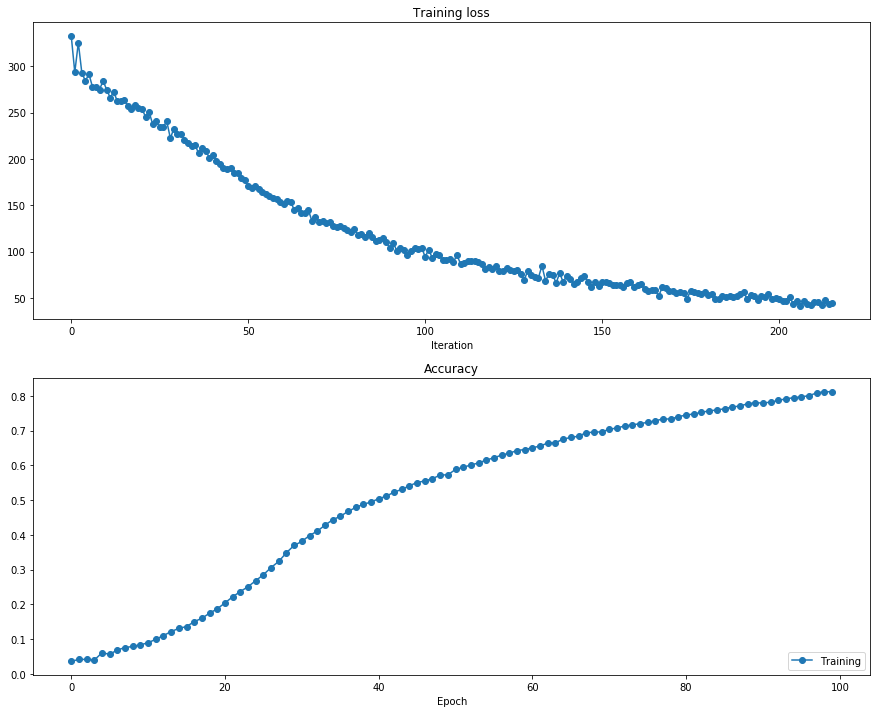

In [73]:
%reload_ext autoreload

opt_params, loss_hist, train_acc_hist = results

# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

plt.show()

Now we can generate a text using the trained model. We can start from a specific word in the original text, such as `she`.

In [75]:
%reload_ext autoreload

# you can change the generated text length below.
text_length = 100

idx = 15
# you also can start from specific word. 
# since the words are all converted into lower case
idx = int(np.where(np.asarray(word_list) == 'She'.lower())[0])

# sample from the trained model
words = model.sample(idx, text_length-1)

# convert indices into words
output = [ word_list[i] for i in words]
print(' '.join(output))

she was now only ten inches high, and the simple rules their friends had taught them: such as, that a red-hot poker will burn you if you hold it off.  ‘what a curious feeling!’ said alice; ‘i must be shutting up like a telescope.’  and looked at it, and fortunately was all the words ‘eat me’ were beautifully marked in currants. ‘well, i’ll eat it,’ said alice, ‘and if it was no one listening, this time, as she could not possibly reach it: she could see it was no one listening, this time, as she could not possibly


* Vanilla RNN vs LSTM  
* Problems in these approaches
#### LSTM gives more reliable results than VanillaRNN. LSTM maintain more valid and important sentences with the gates and produces longer sentences while Vanilla RNN can be focused on meaningless words and quickly converges to the repeated words.   The limitation of LSTM and RNN is that it cannot produce totally new/creative phrases since they are depend on the sentence trained. Also, after training is done, it is hard to modify the trained model.